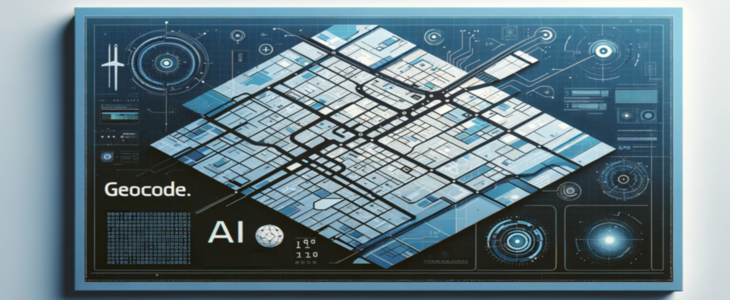

<img src="https://raw.githubusercontent.com/sokrypton/ColabFold/main/.github/ColabFold_Marv_Logo_Small.png" height="180" align="right" style="height:180px">

> # **Geocode:** Artificial intelligence-assisted mapping using aerial imagery



    🤘 Members:
    - Cristian Camilo Rey Rueda - 2200190
    - Irvin Aurelio Silva Báez - 2204128
    - Ramiro Santiago Avila Chacon - 2191920



# Mount the drive ✅

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Pregrado UIS/SEMESTRE VIII 2023-2/Project_AI')
print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive/Pregrado UIS/SEMESTRE VIII 2023-2/Project_AI


# Load the libraries ⏰

In [ ]:
!pip install imantics --quiet
!pip install -U segmentation-models
!pip install -q tensorflow==2.2.1
!pip install -q keras==2.5
!pip install patchify
!pip install -U segmentation-models
!pip install opencv-python

import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.6 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1)
ERROR: No matching distribution found for tensorflow==2.2.1
ERROR: Could not find a version that satisfies the requirement keras==2.5 (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1

In [ ]:
!pip install imantics --quiet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import json
import os
import imantics
from PIL import Image
from skimage.transform import resize
import random
from sklearn.model_selection import train_test_split
%matplotlib inline


import scipy
from tkinter import Tcl
from tqdm import tqdm
import gc

from matplotlib import pyplot as plt
#from patchify import patchify, unpatchify
from PIL import Image
import segmentation_models as sm
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.applications import MobileNet
from keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split



from keras.models import Model
from keras import backend as K
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda

from sklearn.preprocessing import MinMaxScaler

Segmentation Models: using `tf.keras` framework.


# Pre-processing ⏳

In [ ]:
#@title Pre-processing
# Load the dataset
base_dir = '/content/drive/MyDrive/Pregrado UIS/SEMESTRE VIII 2023-2/Project_AI/Semantic segmentation dataset/Tile 1'
images_dir = f'{base_dir}/images'
masks_dir =  f'{base_dir}/masks'


images_listdir = os.listdir(images_dir)[0:20] # Selecciona los primeros 20 elementos de la lista.
random_images = np.random.choice(images_listdir, size = 9, replace = False)

image_size = 256
input_image_size = (256, 256)

def read_image(path):
    img = cv2.imread(path)
    if img is None:
        print(f"No se pudo cargar la imagen: {path}")
        return None

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (image_size, image_size))
    return img


image_path = os.path.join(images_dir, random_images[0])
read_image(image_path)

array([[[143, 142, 156],
        [145, 145, 157],
        [ 79,  78,  94],
        ...,
        [ 55,  51,  47],
        [ 86,  78,  76],
        [141, 131, 130]],

       [[142, 142, 153],
        [172, 171, 185],
        [159, 157, 174],
        ...,
        [ 91,  86,  83],
        [109, 101,  99],
        [ 88,  78,  77]],

       [[163, 163, 170],
        [163, 162, 176],
        [158, 157, 172],
        ...,
        [ 86,  81,  78],
        [ 86,  78,  76],
        [104,  94,  93]],

       ...,

       [[179, 182, 188],
        [188, 189, 192],
        [191, 189, 191],
        ...,
        [131, 125, 145],
        [ 44,  45,  72],
        [ 27,  32,  61]],

       [[159, 158, 165],
        [199, 195, 193],
        [184, 178, 173],
        ...,
        [149, 151, 183],
        [101, 112, 155],
        [124, 141, 188]],

       [[184, 186, 192],
        [192, 192, 183],
        [226, 220, 208],
        ...,
        [ 63,  65,  94],
        [117, 126, 172],
        [  7,  14,  68]]

# Input images 🌞

## Data augmentation

In [ ]:
#@title Directorio para imágenes aumentadas
augmented_images_dir = '/content/drive/MyDrive/GeoCode/Semantic segmentation dataset/Tile 1/augmented_images'
augmented_masks_dir = '/content/drive/MyDrive/GeoCode/Semantic segmentation dataset/Tile 1/augmented_masks'

if not os.path.exists(augmented_images_dir):
    os.makedirs(augmented_images_dir)

if not os.path.exists(augmented_masks_dir):
    os.makedirs(augmented_masks_dir)

In [ ]:
#@title **Solo ejecutar una vez** (Ya la ejecute)
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

def create_data_augmentation_model():
    data_augmentation = ImageDataGenerator(
        rescale=1./255,  # Normaliza las imágenes a un rango de 0 a 1
        samplewise_center=True,  # Centra los datos de cada muestra
        samplewise_std_normalization=True,  # Normaliza la desviación estándar de cada muestra
    )
    return data_augmentation

augmentation_model = create_data_augmentation_model()

def augment_images_and_masks(images_dir, masks_dir, augmented_images_dir, augmented_masks_dir, augmentation_model, num_total_augmentations=30, start_count=73):
    image_files = sorted([f for f in os.listdir(images_dir) if f.endswith('.jpg')])
    mask_files = sorted([f for f in os.listdir(masks_dir) if f.endswith('.png')])
    num_original_images = len(image_files)
    num_augmentations_per_image = max(num_total_augmentations // num_original_images, 1)

    # Inicia el contador desde 73
    count = start_count

    for image_file, mask_file in zip(image_files, mask_files):
        image_path = os.path.join(images_dir, image_file)
        mask_path = os.path.join(masks_dir, mask_file)

        image = load_img(image_path)
        mask = load_img(mask_path)

        image_array = img_to_array(image)
        mask_array = img_to_array(mask)

        image_array = image_array.reshape((1,) + image_array.shape)
        mask_array = mask_array.reshape((1,) + mask_array.shape)

        seed = np.random.randint(10000)

        # Crea los generadores utilizando el contador para el nombre del archivo
        image_gen = augmentation_model.flow(image_array, batch_size=1, save_to_dir=augmented_images_dir, save_prefix=f'image_part_{count}', save_format='jpg', seed=seed)
        mask_gen = augmentation_model.flow(mask_array, batch_size=1, save_to_dir=augmented_masks_dir, save_prefix=f'image_part_{count}', save_format='png', seed=seed)

        for _ in range(num_augmentations_per_image):
            image_gen.next()
            mask_gen.next()
            count += 1  # Incrementa el contador después de cada aumentación

augment_images_and_masks(images_dir, masks_dir, augmented_images_dir, augmented_masks_dir, augmentation_model)

# Data analysis 🆎

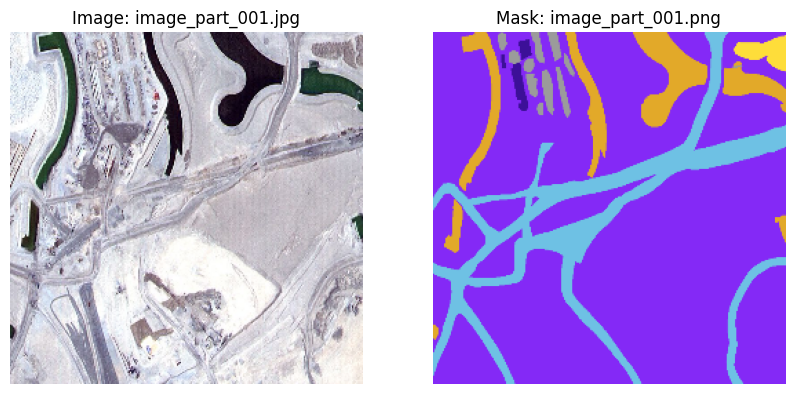

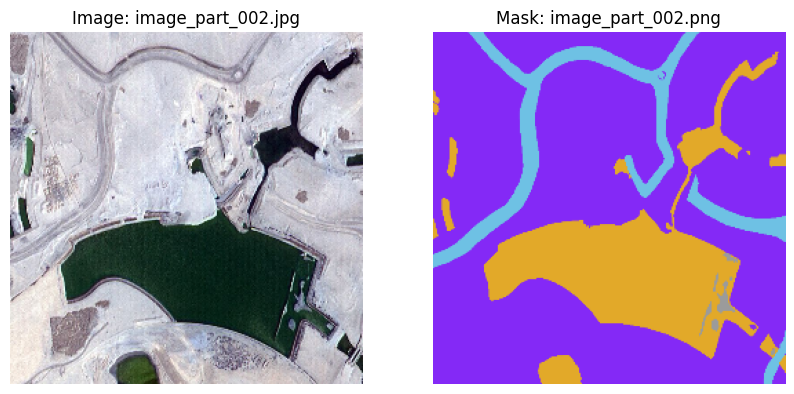

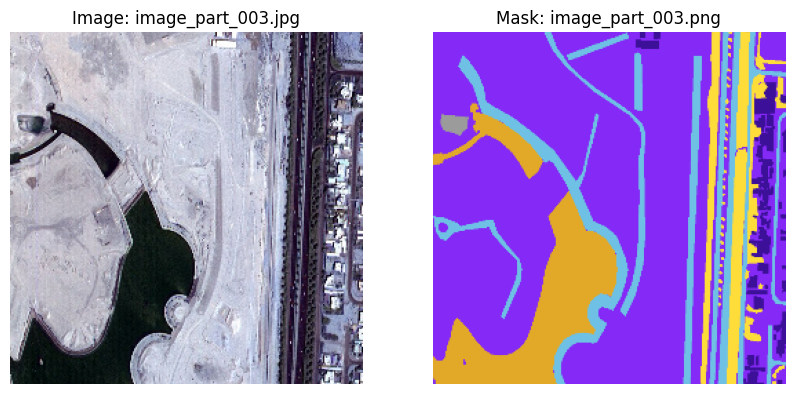

In [ ]:
#@title Definiciones previas visualización de imagenes

def read_image(path, image_size=256):
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    if img is None:
        return None
    if len(img.shape) == 3 and img.shape[2] == 3:  # Check if image is RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (image_size, image_size))
    return img

images_dir = '/content/drive/MyDrive/Pregrado UIS/SEMESTRE VIII 2023-2/Project_AI/Semantic segmentation dataset/Tile 1/images'  # Update this path
masks_dir = '/content/drive/MyDrive/Pregrado UIS/SEMESTRE VIII 2023-2/Project_AI/Semantic segmentation dataset/Tile 1/masks'    # Update this path
image_size = 256

# Obtener una lista de archivos y ordenarlos
image_files = sorted([f for f in os.listdir(images_dir) if f.endswith('.jpg')])
mask_files = sorted([f for f in os.listdir(masks_dir) if f.endswith('.png')])

# Asumiendo que hay un número igual de imágenes y máscaras
for i in range(min(3, len(image_files), len(mask_files))):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Ajusta el tamaño como sea necesario

    # Imagen
    image_path = os.path.join(images_dir, image_files[i])
    img = read_image(image_path)
    if img is not None:
        axes[0].imshow(img)
        axes[0].set_title(f'Image: {image_files[i]}')
    else:
        axes[0].set_title("Error Loading Image")
    axes[0].axis('off')

    # Máscara
    mask_path = os.path.join(masks_dir, mask_files[i])
    mask = read_image(mask_path)
    if mask is not None:
        axes[1].imshow(mask)
        axes[1].set_title(f'Mask: {mask_files[i]}')
    else:
        axes[1].set_title("Error Loading Mask")
    axes[1].axis('off')



In [ ]:
!pip install patchify

In [ ]:
from patchify import patchify

In [ ]:
# Definir el tamaño del parche y el escalador
minmaxscaler = MinMaxScaler()
image_patch_size = 256

# Listas para almacenar los parches de imágenes y máscaras
image_dataset = []
mask_dataset = []

# Procesar imágenes y máscaras
for image_type in ['images', 'masks']:
    if image_type == 'images':
        image_extension = 'jpg'
    else:
        image_extension = 'png'

    for tile_id in range(1, 8):
        for image_id in range(1, 10):
            image_path = f'/content/drive/MyDrive/Pregrado UIS/SEMESTRE VIII 2023-2/Project_AI/Semantic segmentation dataset Cristian/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}'
            image = cv2.imread(image_path)

            if image is not None:
                if image_type == 'masks':
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # Ajustar el tamaño de la imagen
                size_x, size_y = (image.shape[1] // image_patch_size) * image_patch_size, (image.shape[0] // image_patch_size) * image_patch_size
                cropped_image = image[:size_y, :size_x]

                # Dividir en parches
                patched_images = patchify(cropped_image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

                for i in range(patched_images.shape[0]):
                    for j in range(patched_images.shape[1]):
                        patch = patched_images[i, j, 0, :]
                        if image_type == 'images':
                            # Normalizar los parches de imágenes
                            patch = minmaxscaler.fit_transform(patch.reshape(-1, 1)).reshape(patch.shape)
                        (image_dataset if image_type == 'images' else mask_dataset).append(patch)

# Convertir listas a arrays de NumPy
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

# Verificaciones finales
print(f"Total de parches de imagen: {len(image_dataset)}")
print(f"Forma de un parche de imagen: {image_dataset[0].shape}")
print(f"Total de parches de máscara: {len(mask_dataset)}")
print(f"Forma de un parche de máscara: {mask_dataset[0].shape}")

Total de parches de imagen: 945
Forma de un parche de imagen: (256, 256, 3)
Total de parches de máscara: 945
Forma de un parche de máscara: (256, 256, 3)


In [ ]:
print(image_dataset.shape)

(945, 256, 256, 3)


Forma del parche de imagen 0: (256, 256, 3)


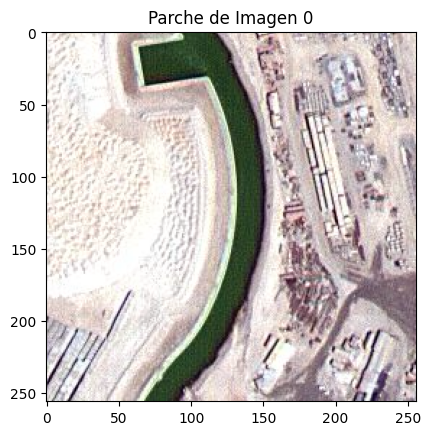

Forma del parche de máscara 0: (256, 256, 3)


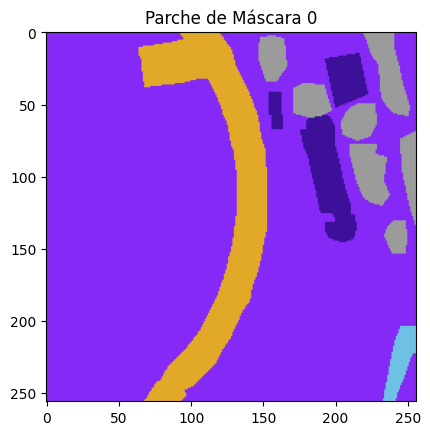

Forma del parche de imagen 1: (256, 256, 3)


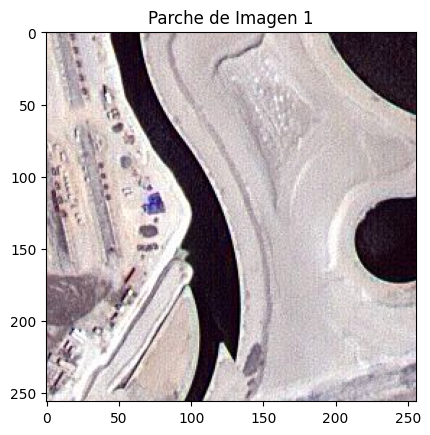

Forma del parche de máscara 1: (256, 256, 3)


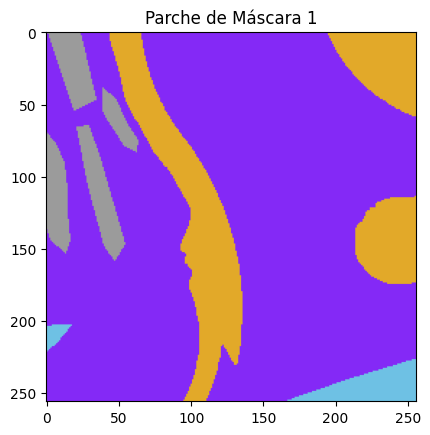

Forma del parche de imagen 2: (256, 256, 3)


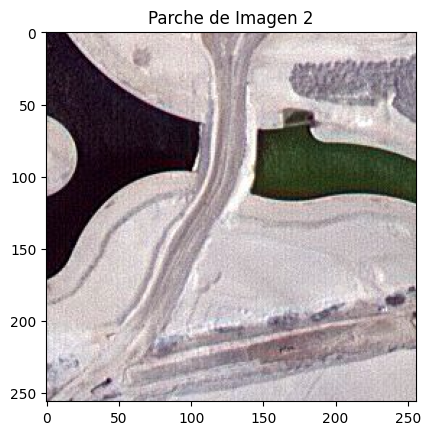

Forma del parche de máscara 2: (256, 256, 3)


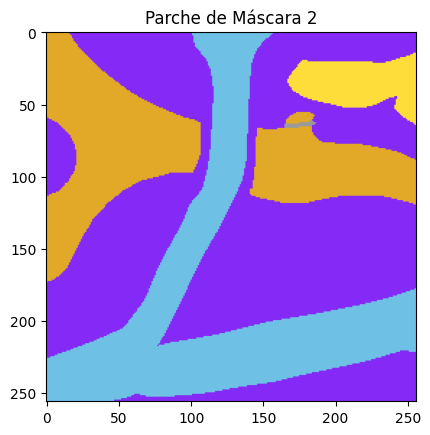

In [ ]:
# Asumiendo que hay un número igual de imágenes y máscaras
for i in range(min(3, len(image_dataset), len(mask_dataset))):
    # Parche de imagen
    img_patch = image_dataset[i]
    if img_patch is not None:
        print(f'Forma del parche de imagen {i}: {img_patch.shape}')
        plt.imshow(img_patch)
        plt.title(f'Parche de Imagen {i}')
        plt.show()

    # Parche de máscara
    mask_patch = mask_dataset[i]
    if mask_patch is not None:
        print(f'Forma del parche de máscara {i}: {mask_patch.shape}')
        plt.imshow(mask_patch)
        plt.title(f'Parche de Máscara {i}')
        plt.show()


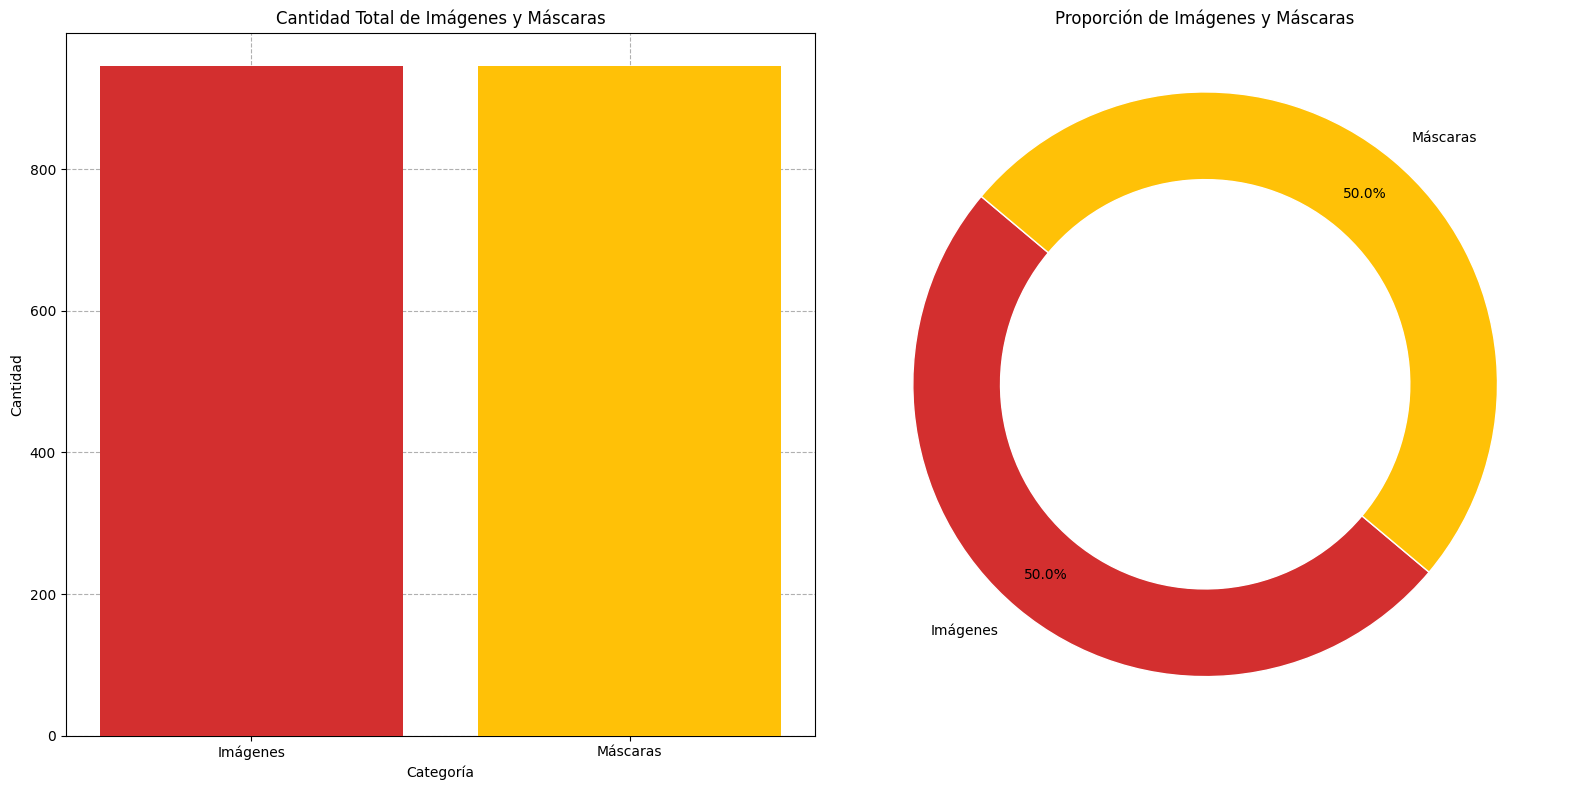

In [ ]:
num_images = len(image_dataset)
num_masks = len(mask_dataset)

bar_colors = ['#D32F2F', '#FFC107']
pie_colors = ['#D32F2F', '#FFC107']

# Categorías para el gráfico de barras
categories = ['Imágenes', 'Máscaras']

# Cantidad para cada categoría
counts = [num_images, num_masks]

# Crear figuras de subplots para mostrar los gráficos uno al lado del otro
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico de barras con un efecto de sombra para simular 3D
axs[0].bar(categories, counts, color=bar_colors, zorder=3)
axs[0].bar(categories, [x - max(counts) * 0.05 for x in counts], color='grey', alpha=0.1, zorder=2)
axs[0].set_title('Cantidad Total de Imágenes y Máscaras')
axs[0].set_xlabel('Categoría')
axs[0].set_ylabel('Cantidad')
axs[0].set_xticks(categories)
axs[0].grid(True, linestyle='--', zorder=0)

# Gráfico de pastel con un efecto 3D
axs[1].pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=pie_colors,
           wedgeprops=dict(width=0.3, edgecolor='w'), pctdistance=0.85)

# Dibujar un círculo blanco en el centro para mejorar el efecto 3D
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

axs[1].set_title('Proporción de Imágenes y Máscaras')
axs[1].axis('equal')  # Esto asegura que el gráfico de pastel sea un círculo.

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

# Etiquetar las clases ✅

In [ ]:
Building = '#3C1098'.lstrip('#')
Building = np.array(tuple(int(Building[i:i + 2], 16) for i in (0, 2, 4)))  # 60, 16, 152

Land = '#8429F6'.lstrip('#')
Land = np.array(tuple(int(Land[i:i + 2], 16) for i in (0, 2, 4)))  # 132, 41, 246

Road = '#6EC1E4'.lstrip('#')
Road = np.array(tuple(int(Road[i:i + 2], 16) for i in (0, 2, 4)))  # 110, 193, 228

Vegetation = 'FEDD3A'.lstrip('#')
Vegetation = np.array(tuple(int(Vegetation[i:i + 2], 16) for i in (0, 2, 4)))  # 254, 221, 58

Water = 'E2A929'.lstrip('#')
Water = np.array(tuple(int(Water[i:i + 2], 16) for i in (0, 2, 4)))  # 226, 169, 41

Unlabeled = '#9B9B9B'.lstrip('#')
Unlabeled = np.array(tuple(int(Unlabeled[i:i + 2], 16) for i in (0, 2, 4)))  # 155, 155, 155



In [ ]:
def rgb_to_2D_label(label):

    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == Building,axis=-1)] = 0
    label_seg [np.all(label==Land,axis=-1)] = 1
    label_seg [np.all(label==Road,axis=-1)] = 2
    label_seg [np.all(label==Vegetation,axis=-1)] = 3
    label_seg [np.all(label==Water,axis=-1)] = 4
    label_seg [np.all(label==Unlabeled,axis=-1)] = 5

    label_seg = label_seg[:,:,0]  #Just take the first channel, no need for all 3 channels

    return label_seg

In [ ]:
labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_2D_label(mask_dataset[i])
    labels.append(label)

# Convertir a array de NumPy y expandir dimensiones
labels = np.array(labels)
labels = np.expand_dims(labels, axis=3)

print("Unique labels in label dataset are: ", np.unique(labels))

Unique labels in label dataset are:  [0 1 2 3 4 5]


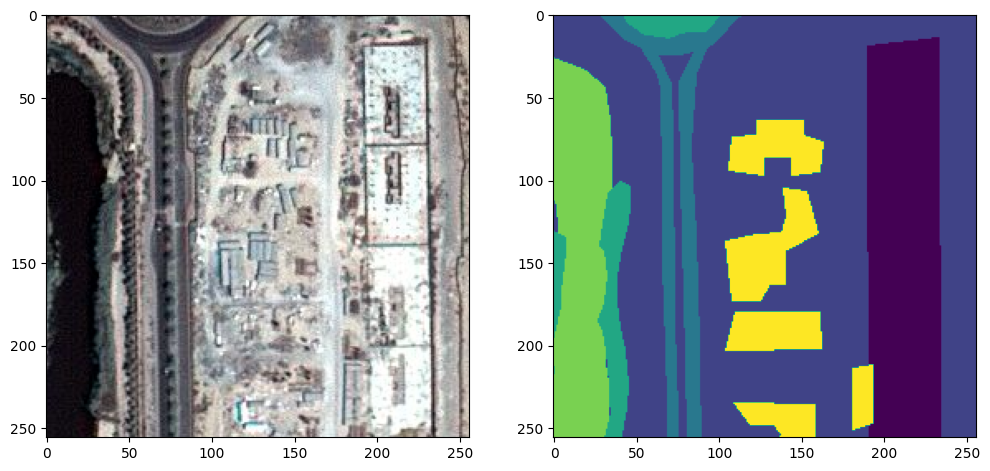

In [ ]:
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
plt.imshow(labels[image_number][:, :, 0])
plt.show()

# U-Net **☣**

In [ ]:
# One hot encoding the labels
n_classes = len(np.unique(labels))
labels_cat = to_categorical(labels, num_classes=n_classes)

# Split the dataset into training and testing:
X_train, X_test, y_train, y_test = train_test_split(image_dataset, labels_cat, test_size=0.20, random_state=42)

# Define input dimensions for the first NN layer
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]

In [ ]:
# Parameters for model
# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
# Set class weights for dice_loss
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

dice_loss = sm.losses.DiceLoss(class_weights=weights)
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

In [ ]:
def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)


#################################################################################################################################

# U-Net Model:
def multi_unet_model(n_classes=4, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=1):
    # Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    # s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    # Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.2)(c1)  # Original 0.1
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.2)(c2)  # Original 0.1
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    # Expansive path
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.2)(c8)  # Original 0.1
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.2)(c9)  # Original 0.1
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])

    return model

In [ ]:
metrics = ['accuracy', jacard_coef]

def get_model():
    return multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

model = get_model()
model.compile(optimizer='adam', loss=total_loss, metrics=metrics)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

EarlyStop = EarlyStopping(patience=20, restore_best_weights=True)

In [ ]:
# Train the model:
history = model.fit(X_train, y_train,
                     batch_size=16,
                     verbose=1,
                     epochs=100,
                     validation_data=(X_test, y_test),
                     shuffle=False,
                     callbacks=[EarlyStop])

Epoch 1/100
48/48 [==============================] - 25s 129ms/step - loss: 1.0004 - accuracy: 0.5508 - jacard_coef: 0.2675 - val_loss: 0.9894 - val_accuracy: 0.6634 - val_jacard_coef: 0.2893
Epoch 2/100
48/48 [==============================] - 3s 71ms/step - loss: 0.9747 - accuracy: 0.6852 - jacard_coef: 0.3977 - val_loss: 0.9666 - val_accuracy: 0.6958 - val_jacard_coef: 0.4207
Epoch 3/100
48/48 [==============================] - 3s 72ms/step - loss: 0.9607 - accuracy: 0.7172 - jacard_coef: 0.4685 - val_loss: 0.9607 - val_accuracy: 0.7181 - val_jacard_coef: 0.4558
Epoch 4/100
48/48 [==============================] - 3s 71ms/step - loss: 0.9537 - accuracy: 0.7474 - jacard_coef: 0.4998 - val_loss: 0.9574 - val_accuracy: 0.7225 - val_jacard_coef: 0.4811
Epoch 5/100
48/48 [==============================] - 3s 71ms/step - loss: 0.9492 - accuracy: 0.7556 - jacard_coef: 0.5223 - val_loss: 0.9499 - val_accuracy: 0.7410 - val_jacard_coef: 0.4908
Epoch 6/100
48/48 [=============================

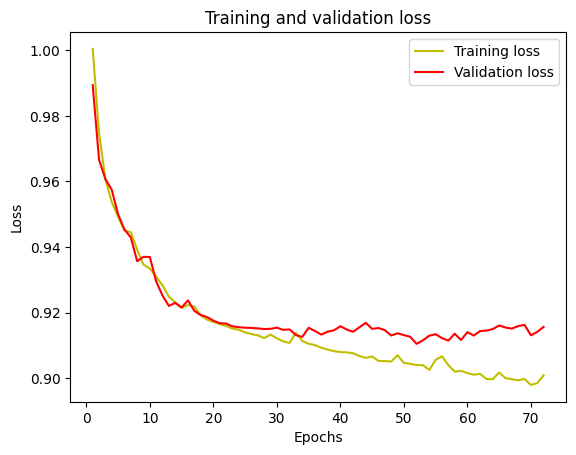

In [ ]:
history = history
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

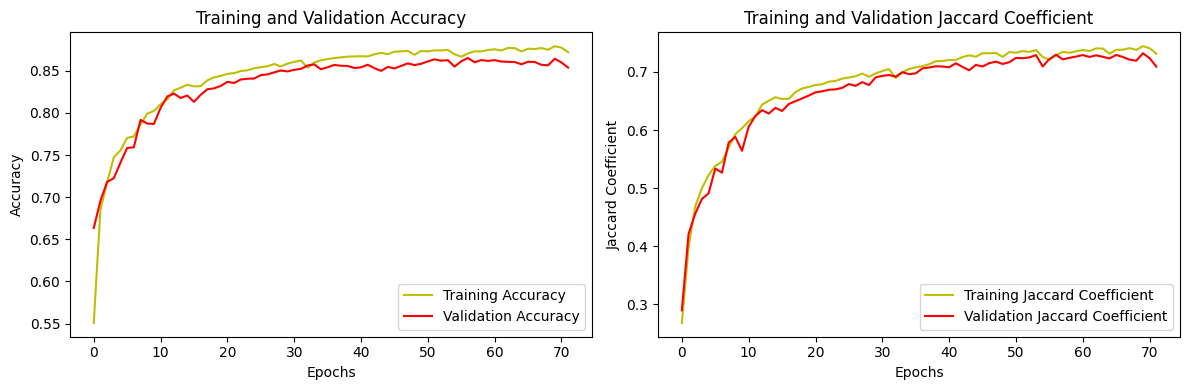

In [ ]:
# Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'y', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Jaccard Coefficient
plt.subplot(1, 2, 2)
plt.plot(history.history['jacard_coef'], 'y', label='Training Jaccard Coefficient')
plt.plot(history.history['val_jacard_coef'], 'r', label='Validation Jaccard Coefficient')
plt.title('Training and Validation Jaccard Coefficient')
plt.xlabel('Epochs')
plt.ylabel('Jaccard Coefficient')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# IOU
y_pred = model.predict(X_test)
y_pred_argmax = np.argmax(y_pred, axis=3)
y_test_argmax = np.argmax(y_test, axis=3)

# Using built in keras function for IoU
n_classes = 6
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(y_test_argmax, y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

6/6 [==============================] - 2s 146ms/step
Mean IoU = 0.58369523


1/1 [==============================] - 0s 21ms/step


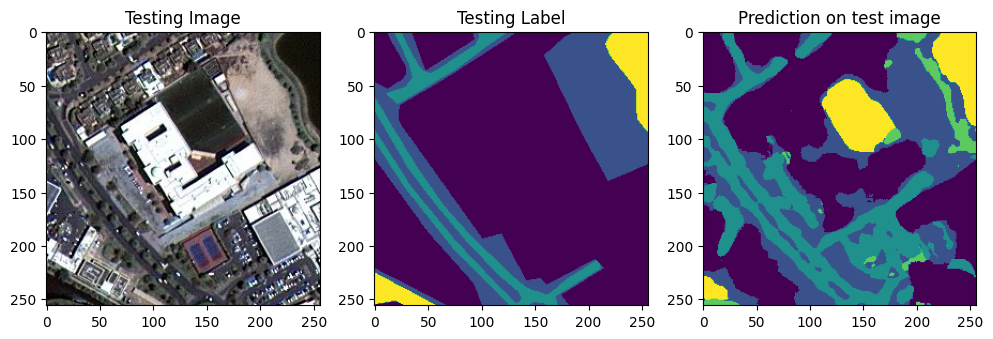

In [33]:
# Predict on a few images
test_img_number = random.randint(0, len(X_test) - 1)
test_img = X_test[test_img_number]
ground_truth = y_test_argmax[test_img_number]
test_img_input = np.expand_dims(test_img, 0)
prediction = (model.predict(test_img_input))
predicted_img = np.argmax(prediction, axis=3)[0, :, :]

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img)
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth)
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img)
plt.show()